# Binary classificationтип
A type of task that helps determine which of two subsets a certain object belongs to (white, black)

# Multi-class classification
A type of task that helps determine which of several subsets a certain object belongs to (red, blue, green)

# Multi-label classification
A type of task that helps determine which of several subsets a certain object belongs to, where the object can have multiple properties (red-round, blue-square, green-diamond-shaped)



**setting up the environment**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import make_circles

**data set**

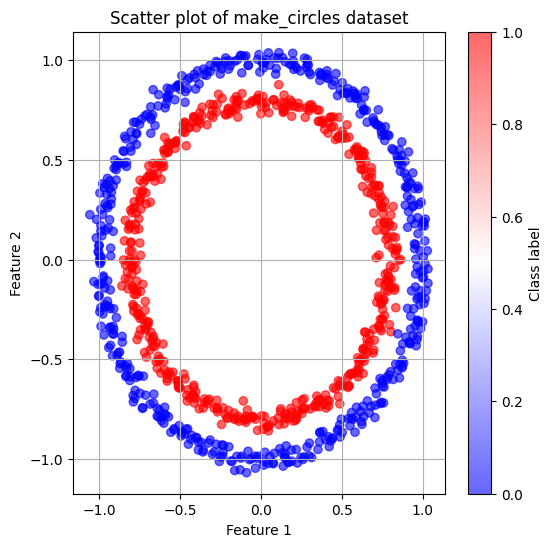

In [2]:
samples = 1000
X, y = make_circles(samples,
                    noise=0.03,
                    random_state=42)

# Рисуем scatter plot, окрашивая точки по классам y
plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.6)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter plot of make_circles dataset')
plt.colorbar(label='Class label')
plt.grid(True)
plt.show()

**buid model**

In [5]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Создаем данные
samples = 1000
X, y = make_circles(samples, noise=0.03, random_state=42)

# Делим данные на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создаем модель
model = Sequential([
    Dense(1, activation='sigmoid', input_shape=(2,))  # один плотный слой, выход 1 нейрон с сигмоидой
])

# Компилируем модель с бинарной кросс-энтропией и метрикой точности
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Обучаем модель
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Оцениваем на тестовых данных
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy:.4f}")

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4985 - loss: 0.7227 - val_accuracy: 0.5188 - val_loss: 0.7000
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5170 - loss: 0.7162 - val_accuracy: 0.5188 - val_loss: 0.6993
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4878 - loss: 0.7290 - val_accuracy: 0.5188 - val_loss: 0.6987
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4915 - loss: 0.7248 - val_accuracy: 0.5188 - val_loss: 0.6981
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4926 - loss: 0.7238 - val_accuracy: 0.5188 - val_loss: 0.6975
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5064 - loss: 0.7185 - val_accuracy: 0.5188 - val_loss: 0.6969
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4838 - loss: 0.7212 - val_accuracy: 0.5188 - val_loss: 0.6964
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5022 - loss: 0.7127 - val_accuracy: 0.5188 - val_loss: 0.6959
Ep

**the model is not linear, I add a non-linear layer**

In [6]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Создаем данные
samples = 1000
X, y = make_circles(samples, noise=0.03, random_state=42)

# Делим данные на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создаем модель
model = Sequential([
    Dense(10, activation='relu', input_shape=(2,)),
    Dense(1, activation='sigmoid', input_shape=(2,))  # один плотный слой, выход 1 нейрон с сигмоидой
])

# Компилируем модель с бинарной кросс-энтропией и метрикой точности
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Обучаем модель
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Оцениваем на тестовых данных
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy:.4f}")

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5106 - loss: 0.7230 - val_accuracy: 0.5125 - val_loss: 0.7206
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4709 - loss: 0.7295 - val_accuracy: 0.5125 - val_loss: 0.7151
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4717 - loss: 0.7271 - val_accuracy: 0.5125 - val_loss: 0.7110
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5135 - loss: 0.6991 - val_accuracy: 0.5125 - val_loss: 0.7077
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4968 - loss: 0.7093 - val_accuracy: 0.5125 - val_loss: 0.7039
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5194 - loss: 0.6929 - val_accuracy: 0.5125 - val_loss: 0.7020
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4950 - loss: 0.7094 - val_accuracy: 0.5125 - val_loss: 0.6994
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4826 - loss: 0.7009 - val_accuracy: 0.5188 - val_loss: 0.6974
Ep

**increasing the number of neurons in the hidden layer**

In [7]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Создаем данные
samples = 1000
X, y = make_circles(samples, noise=0.03, random_state=42)

# Делим данные на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создаем модель
model = Sequential([
    Dense(32, activation='relu', input_shape=(2,)),
    Dense(1, activation='sigmoid', input_shape=(2,))  # один плотный слой, выход 1 нейрон с сигмоидой
])

# Компилируем модель с бинарной кросс-энтропией и метрикой точности
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Обучаем модель
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Оцениваем на тестовых данных
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy:.4f}")

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.4567 - loss: 0.7148 - val_accuracy: 0.5312 - val_loss: 0.6946
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4925 - loss: 0.7034 - val_accuracy: 0.5250 - val_loss: 0.6939
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4644 - loss: 0.7021 - val_accuracy: 0.5000 - val_loss: 0.6935
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4782 - loss: 0.6977 - val_accuracy: 0.5063 - val_loss: 0.6930
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5031 - loss: 0.6898 - val_accuracy: 0.4750 - val_loss: 0.6933
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5044 - loss: 0.6885 - val_accuracy: 0.4750 - val_loss: 0.6929
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5108 - loss: 0.6868 - val_accuracy: 0.4500 - val_loss: 0.6926
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4567 - loss: 0.6935 - val_accuracy: 0.4750 - val_loss: 0.6919
E

**increasing the number of neurons in the hidden layer and adding another layer**

In [11]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Создаем данные
samples = 1000
X, y = make_circles(samples, noise=0.03, random_state=42)

# Делим данные на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создаем модель
model = Sequential([
    Dense(32, activation='relu', input_shape=(2,)),
    Dense(32, activation='relu'),

    Dense(1, activation='sigmoid')  # один плотный слой, выход 1 нейрон с сигмоидой
])

# Компилируем модель с бинарной кросс-энтропией и метрикой точности
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Обучаем модель
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Оцениваем на тестовых данных
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy:.4f}")

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5151 - loss: 0.6988 - val_accuracy: 0.4625 - val_loss: 0.6949
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4924 - loss: 0.6896 - val_accuracy: 0.4688 - val_loss: 0.6937
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5044 - loss: 0.6868 - val_accuracy: 0.4688 - val_loss: 0.6920
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5042 - loss: 0.6807 - val_accuracy: 0.4688 - val_loss: 0.6907
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4931 - loss: 0.6832 - val_accuracy: 0.4688 - val_loss: 0.6863
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5335 - loss: 0.6747 - val_accuracy: 0.4688 - val_loss: 0.6852
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5105 - loss: 0.6745 - val_accuracy: 0.4750 - val_loss: 0.6804
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5299 - loss: 0.6748 - val_accuracy: 0.4938 - val_loss: 0.6779
Ep

# increased number of epochs and the ability to easily switch between Adam and SGD optimizers

In [12]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.datasets import make_circles

# Создаем данные
samples = 1000
X, y = make_circles(samples, noise=0.03, random_state=42)

# Делим данные на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создаем модель
model = Sequential([
    Dense(32, activation='relu', input_shape=(2,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # выходной слой
])

# Выбираем оптимизатор (раскомментируй нужный)
optimizer = Adam(learning_rate=0.001)
# optimizer = SGD(learning_rate=0.01)

# Компилируем модель с выбранным оптимизатором
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Обучаем модель с увеличенным числом эпох
history = model.fit(X_train, y_train,
                    epochs=50,       # увеличено с 20 до 50
                    batch_size=32,
                    validation_split=0.2)

# Оцениваем модель на тестовых данных
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy:.4f}")


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4909 - loss: 0.6940 - val_accuracy: 0.4313 - val_loss: 0.6933
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4971 - loss: 0.6893 - val_accuracy: 0.4688 - val_loss: 0.6931
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4962 - loss: 0.6866 - val_accuracy: 0.4688 - val_loss: 0.6926
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5095 - loss: 0.6831 - val_accuracy: 0.4688 - val_loss: 0.6917
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5088 - loss: 0.6809 - val_accuracy: 0.4688 - val_loss: 0.6900
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4857 - loss: 0.6813 - val_accuracy: 0.4688 - val_loss: 0.6871
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4919 - loss: 0.6778 - val_accuracy: 0.4688 - val_loss: 0.6837
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4983 - loss: 0.6746 - val_accuracy: 0.4750 - val_loss: 0.6791
Ep

**plot_decision_boundary**

2813/2813 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


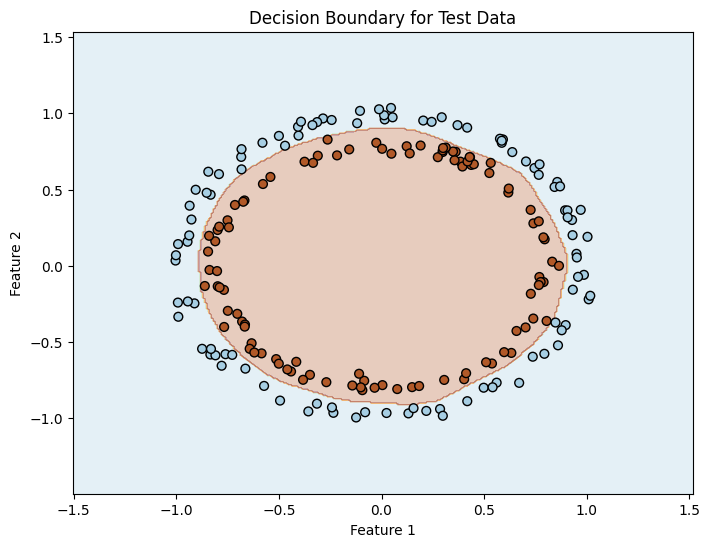

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y, title="Decision Boundary"):
    # Создаем сетку точек для всего диапазона данных
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))

    # Формируем входные данные для модели из сетки точек
    grid_points = np.c_[xx.ravel(), yy.ravel()]

    # Получаем прогнозы модели (вероятности принадлежности к классу 1)
    preds = model.predict(grid_points)

    # Превращаем вероятности в классы 0 или 1, порог 0.5
    preds = (preds > 0.5).astype(int).reshape(xx.shape)

    # Визуализируем
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, preds, alpha=0.3, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Paired, edgecolors='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Использование:
plot_decision_boundary(model, X_test, y_test, title="Decision Boundary for Test Data")


**Implementation of activation functions**

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5635 - loss: 0.6848 - val_accuracy: 0.4688 - val_loss: 0.6912
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5101 - loss: 0.6850 - val_accuracy: 0.4688 - val_loss: 0.6898
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5233 - loss: 0.6800 - val_accuracy: 0.4688 - val_loss: 0.6888
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4735 - loss: 0.6852 - val_accuracy: 0.4688 - val_loss: 0.6879
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5032 - loss: 0.6782 - val_accuracy: 0.4688 - val_loss: 0.6868
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.4809 - loss: 0.6792 - val_accuracy: 0.4688 - val_loss: 0.6849
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4944 - loss: 0.6756 - val_accuracy: 0.4750 - val_loss: 0.6815
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4971 - loss: 0.6734 - val_accuracy: 0.4938 - val_loss: 0.6762
E

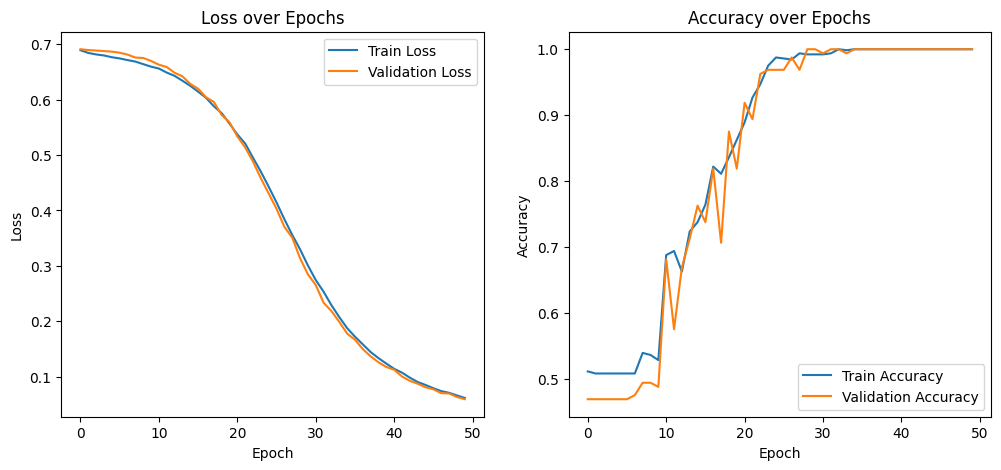

In [16]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

# Создаем данные
samples = 1000
X, y = make_circles(samples, noise=0.03, random_state=42)

# Делим данные на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Функция активации ReLU используется в скрытых слоях:
# она пропускает только положительные значения, помогает модели учиться быстрее и эффективнее
# Функция активации Sigmoid на выходе — для двоичной классификации, переводит выход в вероятность [0,1]

# Создаем модель
model = Sequential([
    Dense(32, activation='relu', input_shape=(2,)),  # скрытый слой с ReLU
    Dense(32, activation='relu'),                      # еще один скрытый слой с ReLU
    Dense(1, activation='sigmoid')                     # выходной слой с сигмоидой
])

# Выбираем оптимизатор (раскомментируй нужный)
optimizer = Adam(learning_rate=0.001)
# optimizer = SGD(learning_rate=0.01)

# Компилируем модель с выбранным оптимизатором
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Обучаем модель с увеличенным числом эпох
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.2)

# Оцениваем модель на тестовых данных
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy:.4f}")

# Визуализация процесса обучения
plt.figure(figsize=(12,5))

# График потерь (loss)
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# График точности (accuracy)
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


# SUM
At the 30th epoch, the model has reached almost maximum accuracy and minimum error, and further training does not bring noticeable improvements. It is necessary to stop training at this stage to save time and avoid overtraining.


also the optimizer adam showed the best result

# 7. Splitting data into training and testing sets

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4827 - loss: 0.7156 - val_accuracy: 0.4875 - val_loss: 0.6976
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4755 - loss: 0.6995 - val_accuracy: 0.4375 - val_loss: 0.6977
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5143 - loss: 0.6889 - val_accuracy: 0.4688 - val_loss: 0.6985
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5470 - loss: 0.6841 - val_accuracy: 0.4688 - val_loss: 0.6956
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5325 - loss: 0.6805 - val_accuracy: 0.4688 - val_loss: 0.6935
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5347 - loss: 0.6784 - val_accuracy: 0.4688 - val_loss: 0.6912
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4937 - loss: 0.6839 - val_accuracy: 0.4688 - val_loss: 0.6886
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5028 - loss: 0.6802 - val_accuracy: 0.4688 - val_loss: 0.6869
Ep

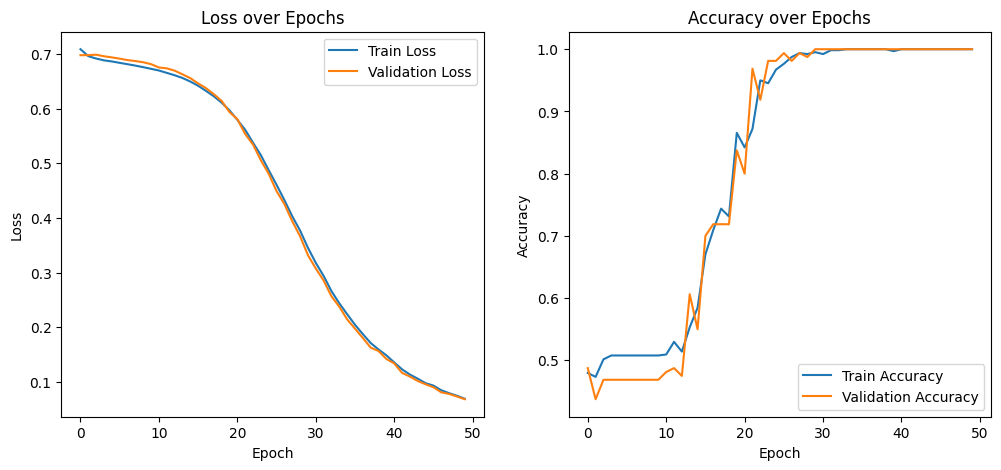

In [17]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

# 1. Создаем синтетические данные
samples = 1000
X, y = make_circles(samples, noise=0.03, random_state=42)

# 2. Разделяем данные на обучающую и тестовую выборки (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Строим модель с ReLU и Sigmoid активациями
model = Sequential([
    Dense(32, activation='relu', input_shape=(2,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# 4. Выбираем оптимизатор (Adam или SGD)
optimizer = Adam(learning_rate=0.001)
# optimizer = SGD(learning_rate=0.01)

# 5. Компилируем модель с бинарной кросс-энтропией и метрикой accuracy
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 6. Обучаем модель (с validation_split для контроля качества)
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# 7. Оцениваем модель на отложенном тестовом наборе
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {accuracy:.4f}")
print(f"Test loss: {loss:.4f}")

# 8. Визуализация процесса обучения: loss и accuracy
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


# SUM
The model gradually improved and from about the 30th epoch reached high accuracy (around 99–100%) on both the training and validation sets. The test accuracy was 100%, and the loss value was about 0.098, indicating excellent model quality. This means that training after the 30th epoch provides minimal gain, so the process can be stopped earlier, for example, by using early stopping.

# 8.Evaluate and visualize the performance of the final model

2813/2813 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


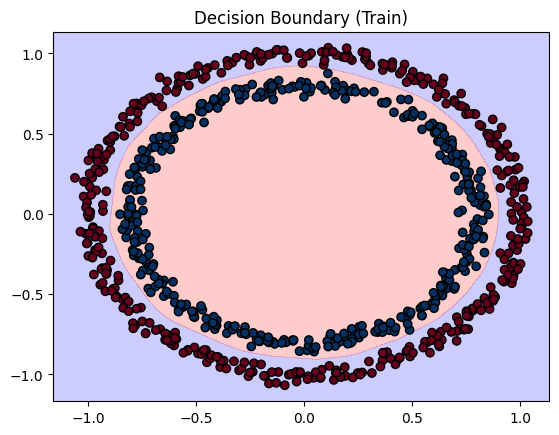

2813/2813 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


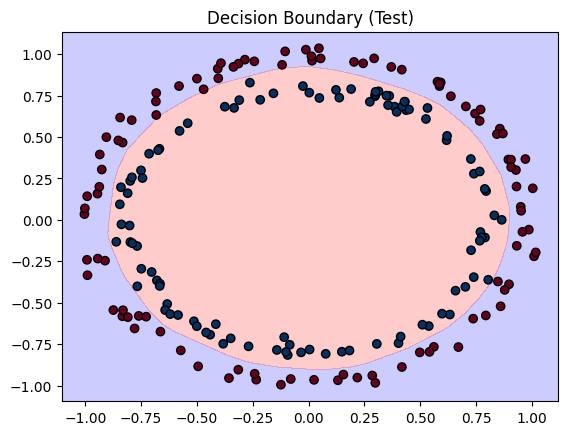

In [18]:
import numpy as np

def plot_decision_boundary(model, X, y, title="Decision Boundary"):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )
    grid = np.c_[xx.ravel(), yy.ravel()]
    preds = model.predict(grid)
    preds = preds.reshape(xx.shape)

    plt.contourf(xx, yy, preds, levels=[0, 0.5, 1], alpha=0.2, colors=['blue', 'red'])
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu, edgecolors='k')
    plt.title(title)
    plt.show()

# Вызов:
plot_decision_boundary(model, X_train, y_train, "Decision Boundary (Train)")
plot_decision_boundary(model, X_test, y_test, "Decision Boundary (Test)")


# SUM
The decision boundary shows a clear separation of classes on the training set and maintains its overall shape on the test set, which indicates good generalization and no significant overfitting. The model adequately handles new information.

Also, it’s worth adding that visual representation plays a key role in presenting data to a wide audience, as it is one of the main factors for making a convincing argument.
As for **hyperparameters**, it can be noted that they are a core set of tools that make it possible to solve a wide range of tasks.
